In [104]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

def gauss(mu, sigma, x):
    return 1./(sigma * np.sqrt(2. * np.pi) ) * np.exp( -(x-mu)**2./(2. * sigma**2.))

In [156]:
c = np.zeros([50,40,60])

x_com = c.shape[2]/2.
y_com = c.shape[1]/2.
z_com = c.shape[0]/2.

XX = np.arange(0.,c.shape[2]) - x_com
YY = np.arange(0.,c.shape[1]) - y_com
ZZ = np.arange(0.,c.shape[0]) - z_com

#xx,yy = np.meshgrid(XX,YY)
xx,yy,zz = np.meshgrid(XX,YY,ZZ, indexing="ij")
xx = xx.T
yy = yy.T
zz = zz.T

#dd2D = np.sqrt(xx**2. + (yy)**2.)
dd3D = np.sqrt(xx**2. + (yy)**2. + (zz)**2.)

sigma = 5.
g = gauss(0., sigma, dd3D)
c = g.reshape(c.shape)

c = dd3D <= sigma

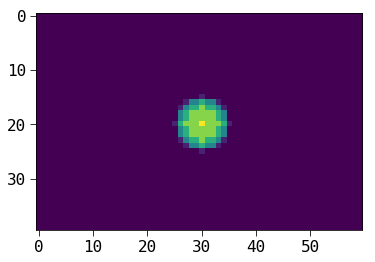

In [157]:
plt.imshow(np.sum(c,axis=0))

In [158]:
mx = np.max(c)
scale = 10000.
cov3d = np.cov( [xx.flatten(), yy.flatten(), zz.flatten()], fweights=np.array( c.flatten()*scale/mx , dtype=int) )
cov2d = np.cov( [xx.flatten(), yy.flatten()], fweights=np.array( c.flatten()*scale/mx , dtype=int) )

sqr_cov3d = np.sqrt( cov3d)
dx = sqr_cov3d[0,0]
dy = sqr_cov3d[1,1]
dz = sqr_cov3d[2,2]
print(dx,dy,dz)

eigenval,eigenvec = np.linalg.eig(cov2d)
print(np.sqrt( eigenval ))
print(np.sqrt(np.sum(eigenval)))
e1,e2 = np.sqrt( eigenval )

2.225187019584562 2.225187019584562 2.225187019584562
[2.22518702 2.22518702]
3.1468896619130535


In [159]:
proj  = np.sum(c,axis=0)
mx = np.max(proj)
scale = 10000.
cov = np.cov( [xx.flatten(), yy.flatten(), zz.flatten()], fweights=np.array( c.flatten()*scale/mx , dtype=int) )

print(np.sqrt( cov))

[[2.22518918 0.         0.        ]
 [0.         2.22518918 0.        ]
 [0.         0.         2.22518918]]


In [160]:
eigenval,eigenvec = np.linalg.eig(cov)
print(np.sqrt(eigenval))
print(np.sqrt(np.sum(eigenval)))

[2.22518918 2.22518918 2.22518918]
3.8541407165616066


In [161]:
3.99116267*1.4

5.587627738

In [162]:
ii = c > 0.
M = np.sum(c[ii])



dx = np.sqrt( np.sum( c[ii] * (xx[ii] - x_com)**2. ) / M ) 
dy = np.sqrt( np.sum( c[ii] * (yy[ii] - y_com)**2. ) / M ) 
dz = np.sqrt( np.sum( c[ii] * (zz[ii] - z_com)**2. ) / M ) 

In [142]:
dx, dy, dz

(30.41381265424993, 20.61537031147292, 25.49509703965959)

In [146]:
a = np.arange(-50,50,1.)


g = gauss(0., 2.5, a)

M = np.sum(g)
np.sqrt( np.sum( g * (a)**2. ) / M ) 

2.5